<a href="https://colab.research.google.com/github/arpitarumma/NeuralNetworkmodels/blob/main/NNDL8LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

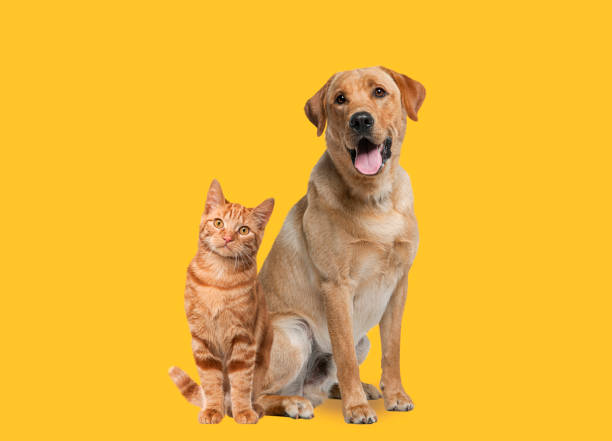

In [4]:
from IPython.display import Image
Image("/content/istockphoto-1435010849-612x612.jpg")  # Display sample image


In [10]:
import numpy as np
import cv2
import os

# Define the image path
image_path = "/content/istockphoto-1435010849-612x612.jpg"

# Load the image
image = cv2.imread(image_path)  # Read image using OpenCV

# Resize the image (Optional - Resize to 64x64 for LSTMs)
image = cv2.resize(image, (64, 64))

# Normalize pixel values (Convert to range 0-1)
image_array = np.array(image) / 255.0

# Expand dimensions to fit LSTM input format (samples, time steps, features)
image_array = np.expand_dims(image_array, axis=0)  # Shape: (1, 64, 64, 3)

# Define the folder to save .npy files
data_folder = "/content/data"
os.makedirs(data_folder, exist_ok=True)  # Create folder if not exists

# Create dummy labels (e.g., class label = 1)
label = np.array([1])

# Save as .npy files
np.save(os.path.join(data_folder, "x_train.npy"), image_array)
np.save(os.path.join(data_folder, "y_train.npy"), label)
np.save(os.path.join(data_folder, "x_test.npy"), image_array)
np.save(os.path.join(data_folder, "y_test.npy"), label)

print("✅ Saved x_train.npy, y_train.npy, x_test.npy, and y_test.npy successfully!")


✅ Saved x_train.npy, y_train.npy, x_test.npy, and y_test.npy successfully!


In [15]:
import numpy as np
import os

data_folder = "/content/data"  # Folder where we saved .npy files

# Load dataset
x_train = np.load(os.path.join(data_folder, "x_train.npy"))
y_train = np.load(os.path.join(data_folder, "y_train.npy"))
x_test = np.load(os.path.join(data_folder, "x_test.npy"))
y_test = np.load(os.path.join(data_folder, "y_test.npy"))

# Print shapes to confirm
print("x_train shape:", x_train.shape)  # (1, 64, 64, 3)
print("y_train shape:", y_train.shape)  # (1,)
# Reshape image for LSTM input (Convert each row of pixels into a sequence)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], -1))  # Shape: (1, 64, 192)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], -1))  # Shape: (1, 64, 192)

print("New x_train shape:", x_train.shape)  # Expected (1, 64, 192)
print("New x_test shape:", x_test.shape)  # Expected (1, 64, 192)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Define sequence length & features
timesteps = x_train.shape[1]  # 64
features = x_train.shape[2]   # 192

# Build LSTM Autoencoder
autoencoder = Sequential([
    # Encoder
    LSTM(128, activation="relu", input_shape=(timesteps, features), return_sequences=False),
    Dense(64, activation="relu"),

    # Repeat latent vector to match original sequence shape
    RepeatVector(timesteps),

    # Decoder
    LSTM(128, activation="relu", return_sequences=True),
    TimeDistributed(Dense(features, activation="sigmoid"))  # Output shape: (64, 192)
])

# Compile model
autoencoder.compile(optimizer="adam", loss="mse")

# Model summary
autoencoder.summary()
autoencoder.fit(x_train, x_train, epochs=100, batch_size=1, validation_data=(x_test, x_test))
# Predict reconstructed image
reconstructed = autoencoder.predict(x_test)

# Reshape back to original image format
reconstructed_image = reconstructed.reshape((64, 64, 3))

# Convert values back to 0-255 for visualization
reconstructed_image = (reconstructed_image * 255).astype("uint8")

# Save or display the image
import cv2
cv2.imwrite("/content/reconstructed_image.jpg", reconstructed_image)

print("✅ Reconstructed image saved as 'reconstructed_image.jpg'!")




x_train shape: (1, 64, 64, 3)
y_train shape: (1,)
New x_train shape: (1, 64, 192)
New x_test shape: (1, 64, 192)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 64, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 64, 192)             │          24,768 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296,192 (1.13 MB)

 Trainable params: 296,192 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.1232 - val_loss: 0.1189
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1189 - val_loss: 0.1149
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 0.1149 - val_loss: 0.1091
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.1091 - val_loss: 0.1025
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.1025 - val_loss: 0.0992
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0992 - val_loss: 0.0916
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0916 - val_loss: 0.0913
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 0.0913 - val_loss: 0.0855
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.0855 - val_loss: 0.0806
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.0806 - val_loss: 0.1535
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.1535 - val_loss: 0.0746
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 0.0746 - 

In [16]:
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything(42)  # Set the seed
serie_size = x_train.shape[1]  # Sequence length
n_features = x_train.shape[2]  # Number of features

encoder_decoder = Sequential([
    LSTM(serie_size, activation='relu', input_shape=(serie_size, n_features), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),  # Latent space representation
    Dense(serie_size, activation='linear')  # Output layer
])

# Compile the model
adam = optimizers.Adam(learning_rate=0.001)
encoder_decoder.compile(loss='mse', optimizer=adam)

# Model summary
encoder_decoder.summary()
mlp_model = Sequential([
    Dense(64, activation='relu', input_dim=32),  # Input matches LSTM output
    Dense(1)  # Output layer for prediction
])

# Summary
mlp_model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64, 64)              │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,320 (313.75 KB)

 Trainable params: 80,320 (313.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)